# POS tagging demo with colour-coded highlights

In [1]:
import nltk

# Ensure required NLTK resources are present (works even if already downloaded)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
nltk.download('punkt', quiet=True)
from nltk.tokenize import word_tokenize

import pandas as pd
import utsnlp as uts

Package pylibcheck is installed and loaded.
OK: Package numpy is installed.
Installing package "Wikipedia-API"...
DONE: Package Wikipedia-API is up to date.
OK: Package pandas is installed.
OK: Package matplotlib is installed.
OK: Package seaborn is installed.
OK: Package contractions is installed.
OK: Package nltk is installed.
OK: Package wordcloud is installed.
OK: Package plotly is installed.
OK: Package d3blocks is installed.
OK: Package bs4 is installed.


## Define a text to analyze

In [2]:
# Sample text

#text = "The quick brown fox jumps over the lazy dog"
#text = "The sustainable investor considers metrics, while GreenCapital and EcoFunds highlight that returns once varied, still varying, already varied, frequently vary, and sometimes varies. A responsible greener greenest portfolio can align sustainably, more sustainably, and most sustainably. The determiner each preliminary which framework guides progress. She values her approach, who questions whose assumptions. Partnerships and collaboration matter. Ten policies support initiatives. There exist foreign words like “Nachhaltigkeit.” First, regulators may intervene. Investors’ trust stands up. Symbols like © reflect accountability. To achieve targets is essential. Ah, enthusiasm persists."
text = uts.get_text_from_url("https://www.abc.net.au/news/2025-08-18/fine-sydney-developer-illegally-cutting-trees-for-luxury-mansion/105628970")


In [3]:
text

'Personalise the news and stay in the know Emergency Backstory Newsletters 中文新闻 BERITA BAHASA INDONESIA TOK PISIN Stateline Topic: Courts The development application submitted in 2023 was for a luxurious $3 million neo-classical style mansion. ( Source: Development Application ) A property developer of a $3 million mansion has been fined after illegally clearing hundreds of trees in Sydney\'s south. A community group says they are "horrified" with the punishment, while a Greens MP dubbed it a "slap on the wrist". The mansion features six bedrooms, eight bathrooms, multiple kitchens, a movie theatre, a prayer room, a man-cave and library. Residents are "horrified" after a property developer copped a "slap on the wrist" fine for illegally clearing hundreds of trees in a native wildlife corridor to build his dream six bedroom, eight-bathroom mansion in Sydney\'s south, without approval. The 7-hectare site on David Road in Barden Ridge is owned by ACCS Family Holdings, whose sole director 

In [4]:
text_clean=uts.preprocess_text(text, 
                    to_lower=False, 
                    expand_contractions=True,
                    remove_non_english=True,                
                    remove_punctuation=False, 
                    remove_digits=False, 
                    remove_stopwords=False, 
                    remove_short_words_leq=None,
                    lemmatize=False, 
                    stem=False)

In [5]:
text_clean

'Personalise the news and stay in the know Emergency Backstory Newsletters BERITA BAHASA INDONESIA TOK PISIN Stateline Topic: Courts The development application submitted in 2023 was for a luxurious $3 million neo-classical style mansion. A property developer of a $3 million mansion has been fined after illegally clearing hundreds of trees in Sydney\'s south. A community group says they are "horrified" with the punishment, while a Greens MP dubbed it a "slap on the wrist". The mansion features six bedrooms, eight bathrooms, multiple kitchens, a movie theatre, a prayer room, a man-cave and library. Residents are "horrified" after a property developer copped a "slap on the wrist" fine for illegally clearing hundreds of trees in a native wildlife corridor to build his dream six bedroom, eight-bathroom mansion in Sydney\'s south, without approval. The 7-hectare site on David Road in Barden Ridge is owned by ACCS Family Holdings, whose sole director is Amir Abu Abara. A development applicat

In [6]:
text=text_clean

## Tokenize and tag parts-of-speach (POS)

In [7]:
# Tokenizing the text
tokens = word_tokenize(text)

# POS Tagging
tagged = nltk.pos_tag(tokens)

print(tagged)

[('Personalise', 'VB'), ('the', 'DT'), ('news', 'NN'), ('and', 'CC'), ('stay', 'NN'), ('in', 'IN'), ('the', 'DT'), ('know', 'JJ'), ('Emergency', 'NNP'), ('Backstory', 'NNP'), ('Newsletters', 'NNP'), ('BERITA', 'NNP'), ('BAHASA', 'NNP'), ('INDONESIA', 'NNP'), ('TOK', 'NNP'), ('PISIN', 'NNP'), ('Stateline', 'NNP'), ('Topic', 'NNP'), (':', ':'), ('Courts', 'VBZ'), ('The', 'DT'), ('development', 'NN'), ('application', 'NN'), ('submitted', 'VBN'), ('in', 'IN'), ('2023', 'CD'), ('was', 'VBD'), ('for', 'IN'), ('a', 'DT'), ('luxurious', 'JJ'), ('$', '$'), ('3', 'CD'), ('million', 'CD'), ('neo-classical', 'JJ'), ('style', 'NN'), ('mansion', 'NN'), ('.', '.'), ('A', 'NNP'), ('property', 'NN'), ('developer', 'NN'), ('of', 'IN'), ('a', 'DT'), ('$', '$'), ('3', 'CD'), ('million', 'CD'), ('mansion', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('fined', 'VBN'), ('after', 'IN'), ('illegally', 'RB'), ('clearing', 'VBG'), ('hundreds', 'NNS'), ('of', 'IN'), ('trees', 'NNS'), ('in', 'IN'), ('Sydney', 'NNP'), 

In [8]:
# Create dataframe for display
df = pd.DataFrame(tagged, columns=["Word", "POS Tag"])
df

,Word,POS Tag
0,Personalise,VB
1,the,DT
2,news,NN
3,and,CC
4,stay,NN
...,...,...
1635,10,CD
1636,hours,NNS
1637,ahead,RB
1638,of,IN


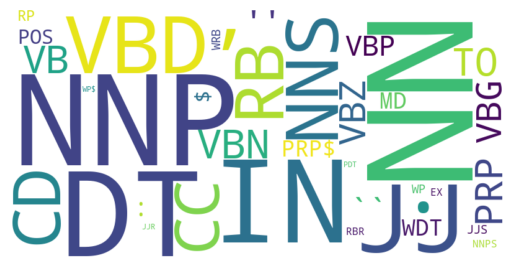

In [9]:
# You could even visualise frequency of POS types as a wordcloud:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_counts = pd.Series([tag for _, tag in tagged]).value_counts()

wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(pos_counts)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
from IPython.display import HTML

def highlight_pos(tagged):
    colors = {
        # Nouns
        "NN": "lightblue", "NNS": "lightblue", "NNP": "deepskyblue", "NNPS": "deepskyblue",
        # Verbs
        "VB": "lightcoral", "VBD": "indianred", "VBG": "tomato",
        "VBN": "salmon", "VBP": "lightpink", "VBZ": "hotpink",
        # Adjectives
        "JJ": "lightgreen", "JJR": "mediumseagreen", "JJS": "darkseagreen",
        # Adverbs
        "RB": "khaki", "RBR": "gold", "RBS": "goldenrod",
        # Determiners & Pronouns
        "DT": "wheat", "PDT": "burlywood", "WDT": "tan",
        "PRP": "lightyellow", "PRP$": "lemonchiffon",
        "WP": "moccasin", "WP$": "peachpuff",
        # Conjunctions
        "CC": "plum", "IN": "violet",
        # Numbers
        "CD": "lightgrey",
        # Other
        "EX": "lightsteelblue",  # existential 'there'
        "FW": "lavender",        # foreign word
        "LS": "thistle",         # list item marker
        "MD": "lightsalmon",     # modal
        "POS": "lightcyan",      # possessive 's
        "RP": "powderblue",      # particle
        "SYM": "lightgoldenrodyellow",  # symbol
        "TO": "honeydew",        # "to"
        "UH": "mistyrose"        # interjection
    }
    html = ""
    for word, tag in tagged:
        color = colors.get(tag[:2], "white")
        html += f"<span style='background-color:{color}; padding:2px 4px; margin:2px; border-radius:4px'>{word}<sub>{tag}</sub></span> "
    return HTML(html)

highlight_pos(tagged)


In [11]:
import ipywidgets as widgets
from IPython.display import display

def tag_text(sentence):
    tokens = word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    return highlight_pos(tagged)

text_box = widgets.Text(
    value="The quick brown fox jumps over the lazy dog",
    description="Sentence:",
    layout=widgets.Layout(width="80%")
)

output = widgets.Output()

def on_submit(change):
    with output:
        output.clear_output()
        display(tag_text(change["new"]))

text_box.observe(on_submit, names="value")
display(text_box, output)

# Initial display
with output:
    display(tag_text(text_box.value))


Text(value='The quick brown fox jumps over the lazy dog', description='Sentence:', layout=Layout(width='80%'))

Output()